<div style="background-color: #FFFACD; padding: 10px;">

# Machine Learning MRes Glossary

<div style="background-color: #FFFACD; padding: 10px;">

## Index:

</div>


- [Types of Machine Learning](#types-of-machine-learning)
- [Regression](#regression)
- [Cost Function](#cost-function)
- [Loss Function](#loss-function)
- [Least Squares](#least-squares)
- [Classification](#classification)
- [Gradient-Based Optimization](#gradient-based-optimization)
- [Gradient Descent](#gradient-descent)
- [Dimensionality Reduction](#dimensionality-reduction)
- [SVD Visualisation](#svd-visualisation)
- [KNN](#KNN)
- [Instance-Based Learning](#Instance-Based-Learning)
- [Model-Based Learning](#Model-Based-Learning)


*Refer to HOML for additional information*






This is a notebook that groups important concepts included within the ML course. Keywords are included within the index list (open the sections for interactive code).

Run the cells below:

In [6]:
pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.


<div style="background-color: #FFFACD; padding: 10px;">

# Types of Machine Learning Systems

There are so many different types of Machine Learning systems that it is useful to classify them in broad categories based on:
• Whether or not they are trained with human supervision (supervised, unsuper‐ vised, semisupervised, and Reinforcement Learning)
• Whether or not they can learn incrementally on the fly (online versus batch learning)
• Whether they work by simply comparing new data points to known data points, or instead detect patterns in the training data and build a predictive model, much like scientists do (instance-based versus model-based learning)
These criteria are not exclusive; you can combine them in any way you like. For example, a state-of-the-art spam filter may learn on the fly using a deep neural net‐ work model trained using examples of spam and ham; this makes it an online, model- based, supervised learning system.

Refer to pg 36 onwards in HOML

<div style="background-color: #FFFACD; padding: 10px;">

# Regression
</div>

**Linear Regression** - The process of linear regression attempts to fit a straight line to a set of data, as well as possible. For this we require a metric known as the cost function (defined below), which essentially describes how poorly the line fits the data - this is to be minimised, corresponding to the best-fitting line. The aim of a linear regression model is to be able to accurately predict a continuous outcome given a set of predictors. This differs from classification, where the set of all outcomes is a finite number of categories.

The code performs linear regression using gradient descent to find the best-fit line for a given set of random data points (**x** and **y**). It iteratively updates the parameters (**theta**) based on the gradients of the cost function, aiming to minimize the mean squared error between the predicted values and the actual target values. The code then prints the final parameter values and visualizes the data points along with the learned linear regression line.

Iteration 0: Cost = 23.16269063840338
Iteration 100: Cost = 2.3960304799611474
Iteration 200: Cost = 2.0512085196160754
Iteration 300: Cost = 2.2546506740724785
Iteration 400: Cost = 2.3221404544880913
Iteration 500: Cost = 2.3397982017050603
Iteration 600: Cost = 2.3442057969839536
Iteration 700: Cost = 2.3452939087910947
Iteration 800: Cost = 2.345561812749283
Iteration 900: Cost = 2.3456277299335
Final parameters:
theta_0 = 3.1299230096458617
theta_1 = 2.10896562748133


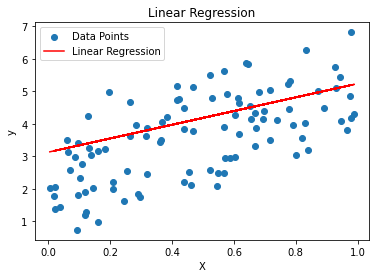

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some random data
np.random.seed(0)
x = np.random.rand(100, 1)
y = 2 + 3 * x + np.random.randn(100, 1)

# Initialize parameters
theta = np.random.randn(2, 1)
learning_rate = 0.01
num_iterations = 1000

# Perform gradient descent
for iteration in range(num_iterations):
    # Compute predictions
    y_pred = x.dot(theta[1]) + theta[0]
    
    # Compute gradients
    gradients = 2 / len(x) * x.T.dot(y_pred - y)
    
    # Reshape gradients to match theta shape
    gradients = gradients.mean(axis=1, keepdims=True)
    
    # Update parameters
    theta -= learning_rate * gradients
    
    # Compute cost, this is an example of a cost function
    cost = np.mean((y_pred - y) ** 2)
    
    # Print cost every 100 iterations
    if iteration % 100 == 0:
        print(f"Iteration {iteration}: Cost = {cost}")

# Print final parameters
print("Final parameters:")
print(f"theta_0 = {theta[0][0]}")
print(f"theta_1 = {theta[1][0]}")

# Plot the data points and the linear regression line
plt.scatter(x, y, label='Data Points')
plt.plot(x, x.dot(theta[1]) + theta[0], color='red', label='Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()



<div style="background-color: #FFFACD; padding: 10px;">

# Cost Function

</div>

The formula used to compute the cost is given by:

$
J(\theta) = \frac{1}{2} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2
$

Where:
- $J(\theta)$ represents the cost function.
- $m$ is the number of training examples.
- $h_\theta(x^{(i)})$ represents the predicted value for the $i$ th training example, obtained by multiplying the input features ($x^{(i)}$) with the parameters ($\theta$).
- $y^{(i)}$ represents the actual target value for the $i$ th training example.

The aim of linear regression is to find the optimal set of parameters ($c$, $\theta_1$, $\theta_2$, ...) that minimises the cost function. This involves finding the global minimum of the cost function on a multi-dimensional hypersurface in parameter-space- by executing the code and providing sample values for the input features (X), target values (y), and parameters (theta), you can compute the cost using the compute_cost function.


The aim of linear regression in the example above, is to find the optimal set of parameters ($c$, $\theta_1$, $\theta_2$, ...) that minimises the cost function. This involves finding the global minimum of the cost function on a multi-dimensional hypersurface in parameter-space.




In [8]:
import numpy as np

def compute_cost(X, y, theta):
    m = len(y)  # Number of training examples
    y_pred = X.dot(theta)  # Compute predictions
    cost = np.sum((y_pred - y) ** 2) / (2 * m)  # Compute cost
    return cost

# Example usage:
X = np.array([[1, 1], [1, 2], [1, 3]])  # Input features
y = np.array([[1], [2], [3]])  # Target values
theta = np.array([[0], [1]])  # Parameters

cost = compute_cost(X, y, theta)
print(f"Cost: {cost}")

# We provide sample values for the input features (X), target values (y), 
# and parameters (theta). We call the compute_cost function with these values 
# and print the resulting cost.

Cost: 0.0


<div style="background-color: #FFFACD; padding: 10px;">

# Loss Function

</div>

The terms "cost function" and "loss function" in machine learning are often used interchangeably, but they technically do have different meanings, especially when dealing with complex models or problems.

Loss Function: A loss function, or error function, quantifies how well a single sample of data meets the learning task objectives. It measures the discrepancy between the prediction of the machine learning model and the actual output for that sample. For instance, in a regression problem, Mean Squared Error (MSE) could be used as a loss function, where it measures the squared difference between the actual and predicted values for a particular data point.

Cost Function: A cost function is the average of the loss functions for all individual data samples in a dataset. It represents the overall 'cost' of the performance of a machine learning model on the entire training dataset. In other words, the cost function is a type of loss function, but it is computed as the aggregate of losses across the set of examples, such as all training samples.

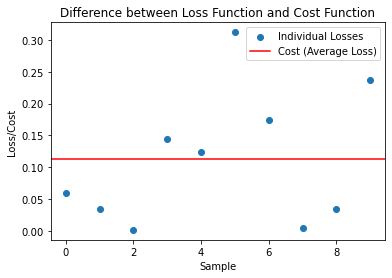

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Generating random predictions and actuals
np.random.seed(0)
predictions = np.random.rand(10)
actuals = np.random.rand(10)

# Calculating individual losses (Mean Squared Error for simplicity)
individual_losses = (predictions - actuals) ** 2

# Calculating cost (mean of individual losses)
cost = np.mean(individual_losses)

# Creating a scatter plot for individual losses
plt.scatter(range(len(individual_losses)), individual_losses, label='Individual Losses')

# Creating a horizontal line representing cost
plt.axhline(y=cost, color='r', linestyle='-', label='Cost (Average Loss)')

plt.title('Difference between Loss Function and Cost Function')
plt.xlabel('Sample')
plt.ylabel('Loss/Cost')
plt.legend()

plt.show()


<div style="background-color: #FFFACD; padding: 10px;">

# Least Squares

</div>

The least squares method is a form of mathematical regression analysis that seeks to find the line of best fit for a set of data points. It is often used as a loss function in Machine Learning, particularly for regression problems. The objective is to minimise the sum of the squared differences between the predicted output and the actual output.

Given a set of $n$ points $(x_1, y_1), (x_2, y_2), ..., (x_n, y_n)$, the least squares loss function is defined as:

$$
L = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

Here, $y_i$ represents the actual output and $\hat{y}_i$ is the predicted output, defined as $\hat{y}_i = f(x_i)$, where $f$ is our model's function.

For a simple linear regression model defined by $\hat{y} = \theta_0 + \theta_1x$, where $\theta$ represents the parameters $(\theta_0, \theta_1)$, the least squares loss function becomes:

$$
L(\theta) = \sum_{i=1}^{n} (y_i - (\theta_0 + \theta_1x_i))^2
$$

In matrix notation, if we have $m$ examples and $n$ features, and we define $X$ as the $m \times n$ input matrix (with a column of ones for the bias term), $y$ as the $m$-dimensional output vector, and $\theta$ as the parameter vector, the least squares loss function is:

$$
L(\theta) = (X\theta - y)^T(X\theta - y)
$$

The optimal solution for the parameters can be found by setting the gradient of $L$ with respect to $\theta$ to zero, and solving for $\theta$. For linear regression models, this can be done analytically using the normal equation:

$$
\theta = (X^TX)^{-1}X^Ty
$$

However, for more complex models or when $X^TX$ is not invertible, iterative optimisation algorithms such as gradient descent are typically used to minimise the loss function.


<div style="background-color: #FFFACD; padding: 10px;">

# Classification

</div>

Classification is a type of supervised learning approach in machine learning where the computer program learns from the input data provided to it and then uses this learning to classify new observations into one of the several classes or categories. 

A classification problem is demonstrated below using Scikit-learn.

In [10]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = datasets.load_iris()

# We only take the first two features and two classes (Iris-setosa and others)
X = iris.data[:100, :2]
y = iris.target[:100]

# Standardising the features
sc = StandardScaler()
X = sc.fit_transform(X)

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialise the model
model = LogisticRegression()

# Fit the model with training data
model.fit(X_train, y_train)

# Predict the test data
y_pred = model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy of the model: {accuracy*100:.2f}%')


Accuracy of the model: 100.00%


<div style="background-color: #FFFACD; padding: 10px;">

# Forward Propagation
</div>
Where input data is fed through a network, in a forward direction, to generate an output. The data is accepted by hidden layers and processed, as per the activation
function, and moves to the successive layer. The forward flow of data is designed to avoid data moving in a circular motion, which does not generate an output.


<div style="background-color: #FFFACD; padding: 10px;">

# Gradient-Based Optimisation (from the Statistics Course)

</div>

In Machine learning, often you will be optimising algorithms to improve the performance of the algorithm. In architechtures such as neural-networks, the weights of the network are *parameters* that can be varied in order to minimise some *loss* function. 

You will see many examples of optimisation and these days there are some extremely sophisticated methods for optimising complicated loss functions, however in this notebook we'll go over the most common starting point for these which is *gradient based optimisation*. 

In statistics, as we've seen in the lectures, the *likelihood* (or negative log-likelihood) function is our loss function and we often need to maximise (minimise) it with respect to one or more of its parameters. 

In general, this means we're looking for the set of parameter values ($\theta$) for which, 

$$
\frac{\partial q}{\partial \theta}= 0
$$

where $q = -\log(L)$

There are two algorithms that use the gradient of the likelihood to find the maximum point that we'll go over in this notebook. 

<div style="background-color: #FFFACD; padding: 10px;">

## Newton method

</div>

You are probably very familar with the Newton method (from school even?), which relies on the gradient of the function to find roots (or zeros) of the function. In our setup, since we are trying to find the zeros of the gradient function, we'll also need to know the 2nd derivative. 

This method is very reliable for 1-dimensional problems (one parameter that is being maximised). The way this works is that from some initial starting point $\theta_{0}$, the algorithm proposes the next step as, 

$$
\theta_{1} = \theta_{0} - \frac{q^{\prime}(\theta_{0})}{q^{\prime\prime}(\theta_{0})}
$$

where $q^{\prime} = \frac{dq}{d\theta}$, and $q^{\prime\prime} = \frac{d^{2}q}{d\theta^{2}}$.

The algorithm continues until some tolerance is reached, $\lvert q^{\prime}\rvert < \delta$ where $\delta$ is some small number greater than 0. 

We'll take a look at an example of this method where we have a unstable particle (let's say a muon) that decays after being produced in a particle collision. In these processes, the probability that the muon decays after a certain time depends on its lifetime ($\tau$),  

Suppose we had an experimental setup, capable of detecting when such decays were occuring and we marked down the times, after some $t_{0}$, that each decay occurs. The time of each decay will be a random variable and will be distributed according to an exponential decay function, 

$$
p(t) = \frac{1}{\tau} e^{-t/\tau}
$$

First, we'll grab some data to use for this. I've put some data in a `.csv` file. From this data, we want to find the value of $\tau$ that minimises the negative log-likelihood for this data. 

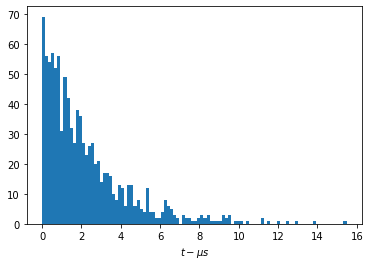

In [1]:
%matplotlib inline

import math
import numpy
import matplotlib.pyplot as plt
import pandas 


data_exp = pandas.read_csv("decay_data.csv")

plt.hist(data_exp["times"],bins=100)
plt.xlabel("$t - \mu s$")
plt.show()

data_exp = numpy.array(data_exp["times"].to_list())

The likelihood is just the product over all of the muon decay times, 

$$
L(\tau) = \prod_{i} \frac{1}{\tau} e^{-t_{i}/\tau}
$$

and the -ve log likelihood is, 

$$
q = -\ln(L) =  N\ln (\tau) + \sum_{i}^{N} \frac{t_{i}}{\tau}  
$$

In [13]:
# define -ve log-likelihood
def q(data,tau):
 N = len(data)
 return N*math.log(tau) + sum(data)/tau

Let's see how the value of $q(\tau)$ changes as we change the value of $\tau$. Use the slider to see how changing the slope of the curve (the parameter $\tau$) changes the value of $q$. 

In [14]:
import ipywidgets

xrange = numpy.linspace(0,16,100)

def pdf(x,tau):
    return (1./tau)*numpy.exp(-x/tau)

def plot_likelihood(tau):
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,6))
    ax1.hist(data_exp,bins=100,histtype='step',color='black',density='true')
    ax1.plot(xrange,pdf(xrange,tau),color='red')
    ax1.set_xlabel("$t - \mu s$")
    ax1.set_ylim(0,0.6)
    
    ax2.plot([tau],[q(data_exp,tau)],color='red',marker='o')
    ax2.set_ylim(1750,1900)
    ax2.set_xlim(1,4)
    ax2.set_xlabel("$\\tau$")
    ax2.set_ylabel("$q(\\tau)$")
    ax2.grid()

ipywidgets.interact(plot_likelihood,tau=(0,4,0.1))


interactive(children=(FloatSlider(value=2.0, description='tau', max=4.0), Output()), _dom_classes=('widget-int…

<function __main__.plot_likelihood(tau)>

We can make a simple static plot of this too

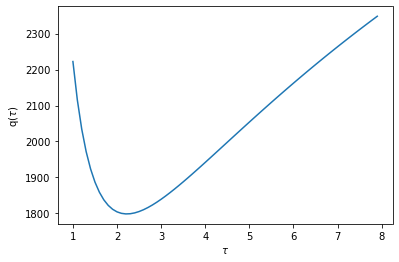

In [15]:
x = numpy.arange(1,8,0.1)
y = [q(data_exp,xx) for xx in x]

plt.plot(x,y)
plt.xlabel("$\\tau$")
plt.ylabel("q($\\tau$)")
plt.show()

Now lets look for the minimum of this curve by finding value of $\tau$ for which $q^{\prime}=0$ using the Newton method. 

We need to write down the derivatives of $q$.

$$
q^{\prime} = \frac{N}{\tau}  -\frac{1}{\tau^{2}}\sum_{i}^{N} t_{i} 
$$

$$
q^{\prime\prime} = -\frac{N}{\tau^{2}} + \frac{2}{\tau^{3}}\sum_{i}^{N} t_{i} 
$$

In [16]:
# define the derivative of the -ve log-likelihood
def dq(data, tau):
 N = len(data)
 return N/tau - sum(data)/(tau*tau)

# define thei second derivative of the -ve log-likelihood
def d2q(data, tau):
 N = len(data)
 return -N/(tau*tau) + 2*sum(data)/(tau*tau*tau)

We start by initialising the algorithm and setting a tolerance for when to stop searching.

In [17]:
# numerical minimum
tol = 0.01
init_tau = 3
eps = 100

# keep a record of the steps
steps = []

while eps > tol:
 steps.append([init_tau,q(data_exp,init_tau)])
 qp = dq(data_exp,init_tau)
 eps = abs(qp)
 init_tau = init_tau - qp/d2q(data_exp,init_tau)
 if init_tau < 0 : init_tau = 0.1
 

numerical_min = init_tau
print("minimum at tau = ",numerical_min, "microseconds")
print("took %d steps"%len(steps))

minimum at tau =  2.222246828655853 microseconds
took 7 steps


![Optimise](explh.gif)

The muon lifetime is known to be $\sim 2.2 \mu s$. This is actually an  example of a maximum likelihood estimate for the muon lifetime. 

<div style="background-color: #FFFACD; padding: 10px;">

## Gradient Descent 

</div>

For functions with more than one variable, we  can use a gradient descent algorithm to find minima and maxima. These methods only rely on the first derivative (the gradient) to find the best direction to step in to find the minimum (or maximum). They don't use the second derivative because for a large number of parameters $n$, the number of terms in the second derivative grows as $n^{2}$ so this can get quite costly. 

There are  a number of subtle different algorithms which rely on gradient descent but we'll go over a simple example. The  way this works is as follows. 

First, we initialise the algorithm at some set of values for the parameters $\boldsymbol{\theta}_{init}$. Then we calcualte the gradient of the negative log-likelihood - $\nabla(q)\rvert_{\boldsymbol{\theta}_{init}}$ - at that initial point. The gradient defines a direction in which the negative log-likelihood changes most rapidly - this makes this direction a good direction to search for a smaller value of $q$.

$$
\begin{align}
\nabla(q)\rvert_{\boldsymbol{\theta}_{init}} &=   
        \begin{bmatrix}
           \frac{\partial q}{\partial \theta_{1}} \\
           \frac{\partial q}{\partial \theta_{2}} \\
           \vdots \\
           \frac{\partial q}{\partial \theta_{n}}
        \end{bmatrix}_{\boldsymbol{\theta}=\boldsymbol{\theta}_{init}}
\end{align}   
$$

Since we want to *decrease* $q$, we need to move against this gradient. We step along the negative gradient direction until we find a new minimum - i.e we pick a step size $h$ and keep adding it to the initial point until the value of $q$ stops decreasing, 


$$
\boldsymbol{\theta}_{k} = k\times h - \nabla(q)\rvert_{\boldsymbol{\theta}_{init}} 
$$

At the value of $k$ such that we're no longer decreasing $q$ (lets call it $k*$), we recalculate the gradient and find a new direction to go in. 

$$
\nabla(q)\rvert_{\boldsymbol{\theta}_{k*}}
$$

We keep repeating this process until the modulus of the gradient gets close enough to zero (say is smaller than some tolerance $\epsilon$, that means we keep iterating until, 

$$
\lvert \nabla(q)\rvert_{\boldsymbol{\theta}} \rvert = \sqrt{\left(\frac{\partial q}{\partial \theta_{1}}\right)^{2} + \left(\frac{\partial q}{\partial \theta_{2}}\right)^{2}+...+\left(\frac{\partial q}{\partial \theta_{n}}\right)^{2}}< \epsilon
$$

Let's look at an example where $n=2$ and the data is assumed to be distributed as a Gaussian with parameters $\mu$ and $\sigma$. We want to find the maximum likelihood estimates $\hat{\mu}$ and $\hat{\sigma}$. 

We'll read in some data from the file `data_grad_desc.csv`. 

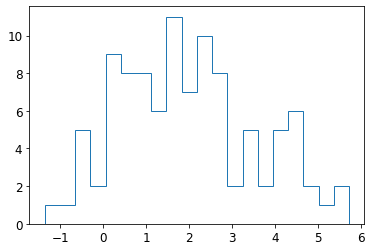

In [18]:
import numpy,pandas
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})

from scipy.stats import norm
data = pandas.read_csv("data_grad_desc.csv")
data = data['values'].to_numpy()
plt.hist(data,bins=20,histtype='step')
plt.show()

Let's see how different values of the Gaussian parameters $\mu$ and $\sigma$ compare when plotted on top of the data, this timee as a histogram of the density.

In [19]:
from scipy.stats import norm 
xrange = numpy.linspace(-2,6,100)

def plot_gaussian(mu,sigma):
    
    plt.hist(data,bins=20,histtype='step',density=True)
    plt.plot(xrange,norm.pdf(xrange,mu,sigma),color='red')
    plt.xlabel("$X$")
    plt.ylim(0,0.4)


ipywidgets.interact(plot_gaussian,mu=(1,3,0.1),sigma=(0.5,3,0.1))

interactive(children=(FloatSlider(value=2.0, description='mu', max=3.0, min=1.0), FloatSlider(value=1.70000000…

<function __main__.plot_gaussian(mu, sigma)>

Next we can define the negative log-likelihood and plot it as a function of $\mu$ and $\sigma$. Remember, the likelihood is just the product over the Gaussian probability density for each value in our dataset. 

The negative log-likelihood in this case is going to be (it's easy to show it) a sum over terms for all 101 points in our dataset. 

$$
q(\mu,\sigma) = -\ln(L(\mu,\sigma)) = \sum_{i=1}^{101} \left[ \ln(\sigma\sqrt{2\pi}) + \frac{1}{2}\frac{\left(X_{i}-\mu\right)^{2}}{\sigma^{2}} \right]
$$

I've also subtracted the smallest value of the negative log-likelihood so that the numbers we have to deal with are more reasonable (of course this won't change where the minimum is). 

Text(0, 0.5, '$\\sigma$')

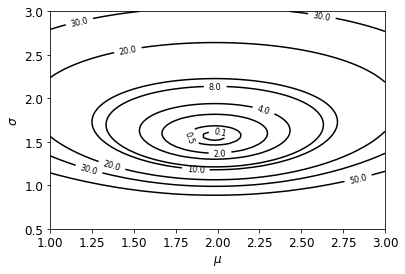

In [20]:
sqrt2pi = (2*numpy.pi)**0.5 

def neg_log_likelihood(point):
    mean=point[0]
    sigma=point[1]
    return sum([numpy.log(sqrt2pi*sigma) + 0.5*(x-mean)*(x-mean)/(sigma*sigma) for x in data])
    
def sum_neg_log_likelihood(mean,sigma):
    return neg_log_likelihood([mean,sigma])

mu    = numpy.linspace(1, 3, 70)
sigma = numpy.linspace(0.5, 3, 70)

X,Y = numpy.meshgrid(mu,sigma)

logL = sum_neg_log_likelihood(X,Y)
# These are large numbers so subtract the smallest one 
logL = logL-logL.min()

contours = plt.contour(X, Y, logL, colors='black',levels=[0.1,0.5,2,4,8,10,20,30,50])
plt.clabel(contours, inline=True, fontsize=8)
plt.xlabel("$\mu$")
plt.ylabel("$\sigma$")

Next we define the gradient and run through our optimisation. Each step is given by the function `gradient_optimise_step` and it returns a new point and the magnitude of the gradient at that point. 

In [21]:
def grad_nll(point):
    mean = point[0]
    sigma = point[1]
    ddmu    = sum([mean/(sigma*sigma) - x/(sigma*sigma) for x in data])
    ddsigma = sum([1./sigma - (1./(sigma*sigma*sigma))*(x-mean)*(x-mean) for x in data])
    return numpy.array([ddmu,ddsigma])

def modulus(point):
    return (point[0]**2+point[1]**2)**0.5

# inititial point -> mu=1.25, sigma=2.5
init = numpy.array([1.25,2.5])
grad_size = modulus(grad_nll(init))

def gradient_optimise_step(init):

  # 1. find the gradient at this point 
  vec = grad_nll(init)

  # 2. Do a very quick line search to find where the minimum is along the line (pick step size of 0.001)
  min_nll = neg_log_likelihood(init)
  start = init  

  for i in range(10):
    new_point = start-0.001*vec
    new_nll   = neg_log_likelihood(new_point)
    if new_nll < min_nll:
      min_nll =  new_nll
      start = new_point
      #print(" line search -> ", new_point,new_nll)
    else: break      
  return new_point, modulus(grad_nll(new_point))

step = []
step.append(init)
while grad_size > 1:
  new,grad_size = gradient_optimise_step(init)
  init = new 
  step.append(init)

print("Minimum found at - ",init)

Minimum found at -  [1.96835639 1.56718272]


![Grad](grad.gif)

Of course, we don't need to write optimisation routines ourselves since there's many good packages out there that have done this for us. For the rest of this course, we'll use the `scipy` and `iminuit` packages for optimisation problems. 

<div style="background-color: #FFFACD; padding: 10px;">

# Dimensionality Reduction
</div>
Dimension reduction is a fundamental step in many data analysis and machine learning tasks. It involves reducing the number of input variables in a dataset. When dealing with high dimensional data, you might want to reduce the dimensionality to simplify the model, reduce the computation time, or remove multicollinearity.

One common technique for dimension reduction is Principal Component Analysis (PCA), PCA is a technique used to emphasize variation and bring out strong patterns in a dataset. It's often used to make data easy to explore and visualize.

Here's a simple example of how to perform PCA using Python's Scikit-learn:


Original number of features: 4
Reduced number of features: 3


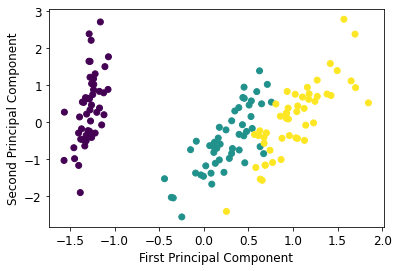

In [22]:
from sklearn.decomposition import PCA
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Create a PCA that will retain 99% of variance
pca = PCA(n_components=0.99, whiten=True)

# Conduct PCA
X_pca = pca.fit_transform(X)

# Show results
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_pca.shape[1])

# Visualise the data in the two-dimensional space
plt.figure(figsize=(6, 4))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()


In the code above, we first import the necessary libraries and load the iris dataset. We then create a PCA object that will retain **99% of the variance** (Remind yourself of why retaining variance is important in performing dimension reduction). We fit and transform the data using this PCA object. Finally, we print the original and reduced number of features and visualize the data in the two-dimensional space.

For more information about PCA and other dimension reduction techniques, you can refer to the Scikit-learn documentation: Scikit-learn: [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).




<div style="background-color: #FFFACD; padding: 10px;">

# SVD Visualisation
</div>

$A = USV^T$ is the original matrix


$U$ is a matrix whose columns are the left singular vectors of $A$.
$S$ (often depicted as Σ) is a diagonal matrix containing the singular values of $A$.
$V^T$ is the transpose of a matrix whose columns are the right singular vectors of $A$.

The singular values in $S$ are the square roots of the eigenvalues of the original matrix $A$. The singular vectors are a set of orthogonal vectors in the domain and range of the original matrix $A$.


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider
from scipy.linalg import svd

np.random.seed(0)  # For reproducible results

A = np.random.rand(10, 10)

U, s, Vt = svd(A)


def plot_svd(num_singular_values):
    S = np.zeros((10, 10))
    S[:num_singular_values, :num_singular_values] = np.diag(s[:num_singular_values])
    
    A_approx = U @ S @ Vt  # Compute approximation of A using reduced singular values

    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    axs[0].imshow(A, cmap='viridis')
    axs[0].set_title('Original Matrix')

    axs[1].imshow(A_approx, cmap='viridis')
    axs[1].set_title(f'Approximation using {num_singular_values} singular values')

    for ax in axs:
        ax.set_xticks([])
        ax.set_yticks([])

    plt.show()


interact(plot_svd, num_singular_values=IntSlider(min=1, max=10, step=1, value=5));


interactive(children=(IntSlider(value=5, description='num_singular_values', max=10, min=1), Output()), _dom_cl…

<div style="background-color: #FFFACD; padding: 10px;">

# K-Nearest Neighbours (k-NN)

</div>

The k-NN algorithm can be used for both classification and regression. It starts with calculating the distance of a new point $x$ to all other points in the data-set. It then finds the $k$ nearest points closest to $x$ and for:

* **classification** we assign the new data point $x$ to the majority class of its $k$-nearest neighbours. For example, if our goal is to classify cats or dogs and the three nearest data-points ($k=3$) to $x$ are classified as cat, cat, dog, then our new point $x$ would be classified as cat. However, if look at the 10 nearest data points ($k=10$) to $x$ and we find now that 4 are cat and 6 are dog, $x$ would be classified as dog.

* **regression** we see labels as continuous variables and assign the label of data point $x$ as the mean of the labels of its k-nearest neighbours.

A commonly used distance is the (classic) Euclidean distance
\begin{equation}
d(\bold{p},\bold{q})=\sqrt{\sum_{i=1}^{D}\left(q_{i}-p_{i}\right)^{2}},
\end{equation}
where $\bold{p}$ and $\bold{q}$ are two points in our $D$-dimensional Euclidean space. Other distances can be chosen interchangably, depending on the problem at hand. 

A helpful resource for the different types of distances and situations where they are used can be found [here](https://www.ibm.com/topics/knn#:~:text=The%20k%2Dnearest%20neighbors%20algorithm%2C%20also%20known%20as%20KNN%20or,of%20an%20individual%20data%20point.).

# [Instance-Based Learning](https://vitalflux.com/instance-based-learning-model-based-learning-differences/#:~:text=Instance%2Dbased%20learning%20(also%20known,easy%20to%20implement%20and%20understand.))

**Instance-based learning** (also known as memory-based learning or lazy learning) involves memorising training data in order to make predictions about future data points. This approach doesn’t require any prior knowledge or assumptions about the data, which makes it easy to implement and understand. 

In instance-based learning, the system learns the training data by heart. At the time of making prediction, the system uses similarity measure and compare the new cases with the learned data. K-nearest neighbors (KNN) is an algorithm that belongs to the instance-based learning class of algorithms.

![KNN - img from homl](instance-based.jpg)

In addition to providing accurate predictions, one major advantage of using KNN over other forms of supervised learning algorithms is its versatility; KNN can be used with both numeric datasets – such as when predicting house prices – and categorical datasets – such as when predicting whether a website visitor will purchase a product or not.


# [Model-Based Learning](https://vitalflux.com/instance-based-learning-model-based-learning-differences/#:~:text=Instance%2Dbased%20learning%20(also%20known,easy%20to%20implement%20and%20understand.))

Model-based learning (also known as structure-based or eager learning) takes a different approach by constructing models from the training data that can generalize better than instance-based methods. This involves using algorithms like linear regression, logistic regression, random forest, etc. trees to create an underlying model from which predictions can be made for new data points. The picture below represents how the prediction about the class is decided based on boundary learned from training data rather than comparing with learned data set based on similarity measures.

![model-based - img from homl](model-based.png)